In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

json_file = sorted(glob.glob("../data/pendulum-table/*json"))[-1]
json_file

'../data/pendulum-table/results-pendulum2021-11-15--01-25.json'

In [127]:
results_disease = pd.read_json(json_file)
results_disease["side_info"] = results_disease.side_info.apply(len)
results_disease["samples"] = results_disease.num_trajectories * results_disease.num_samples
for col in ("test", "training", "box"):
    results_disease[col+"_maxed"] = np.where(results_disease[col] < 1., results_disease[col], 1.)

results_disease.head()

,num_trajectories,training,num_samples,deg,training_x,noise_level,side_info,training_xdot,learned_p,box,obj_value,test,samples,test_maxed,training_maxed,box_maxed
0,1,NaN,5,2,"[[0.7853981633974481, 0.0], [0.593334900985115...",0.0,0,"[[0.0, -0.707106781186547], [-0.49402528528324...","[{'a': [16.244962759533053, 0.220864279586852,...",5.456727,-0.0,NaN,5,1.0,1.000000,1.000000
1,1,0.038378,5,3,"[[0.7853981633974481, 0.0], [0.593334900985115...",0.0,0,"[[0.0, -0.707106781186547], [-0.49402528528324...","[{'a': [0.118783590460781, 0.883885686200745, ...",0.477270,-0.0,NaN,5,1.0,0.038378,0.477270
2,1,0.915956,5,4,"[[0.7853981633974481, 0.0], [0.593334900985115...",0.0,0,"[[0.0, -0.707106781186547], [-0.49402528528324...","[{'a': [1.443219421125504, 0.311610828536456, ...",0.616587,-0.0,NaN,5,1.0,0.915956,0.616587
3,1,0.915956,5,5,"[[0.7853981633974481, 0.0], [0.593334900985115...",0.0,0,"[[0.0, -0.707106781186547], [-0.49402528528324...","[{'a': [5.206070803848475, -4.053929745288935,...",0.725301,-0.0,NaN,5,1.0,0.915956,0.725301
4,1,0.915956,5,6,"[[0.7853981633974481, 0.0], [0.593334900985115...",0.0,0,"[[0.0, -0.707106781186547], [-0.49402528528324...","[{'a': [1.576602883493483, 0.23475798161934203...",0.658510,-0.0,NaN,5,1.0,0.915956,0.658510


<AxesSubplot:xlabel='test_maxed', ylabel='Count'>

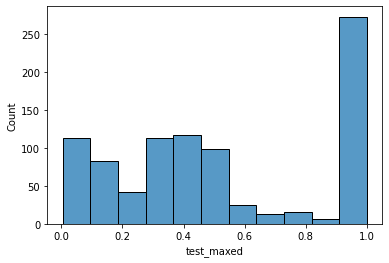

In [128]:
sns.histplot(results_disease.test_maxed)

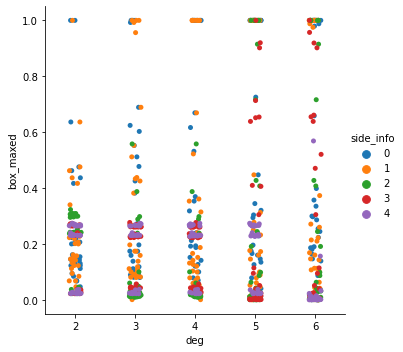

In [129]:
sns.catplot(x="deg", y="box_maxed",  hue="side_info", 
            #kind="swarm", 
            data=results_disease)

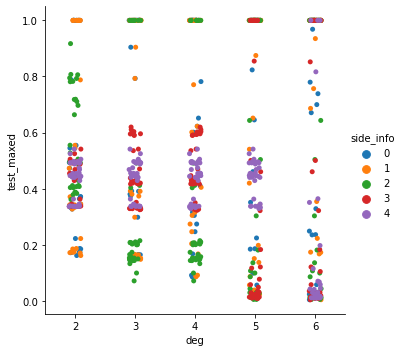

In [130]:
sns.catplot(x="deg", y="test_maxed",  hue="side_info", 
            #kind="swarm", 
            data=results_disease)

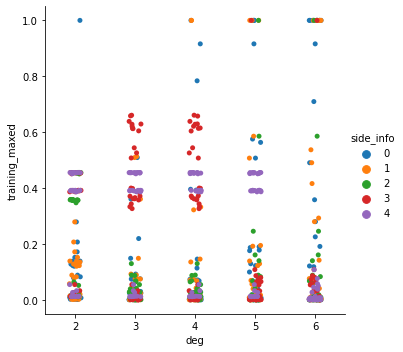

In [131]:
sns.catplot(x="deg", y="training_maxed",  hue="side_info", 
            #kind="swarm", 
            data=results_disease)

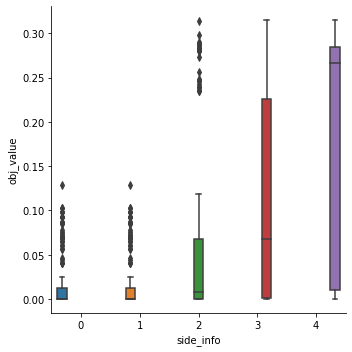

In [132]:
sns.catplot(x="side_info", y="obj_value",  hue="side_info", 
            kind="box", 
            data=results_disease)

(0.0, 0.05)

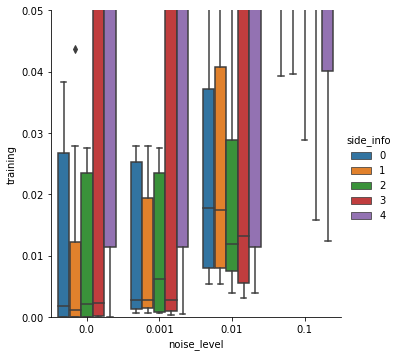

In [133]:
sns.catplot(x="noise_level", y="training",  hue="side_info", 
            kind="box", 
            data=results_disease)
plt.ylim(0, .05)

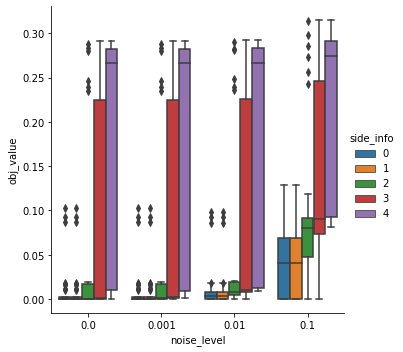

In [134]:
sns.catplot(x="noise_level", y="obj_value",  hue="side_info", 
            kind="box", 
            data=results_disease)

(0.0, 1.0)

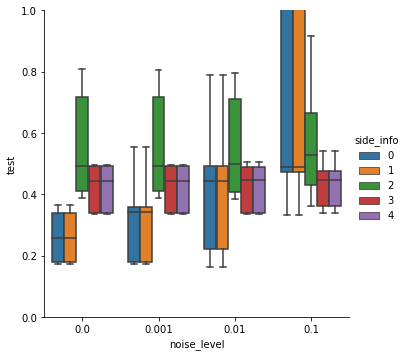

In [135]:
sns.catplot(x="noise_level", y="test",  hue="side_info", 
            kind="box", 
            data=results_disease[results_disease.deg < 3])
plt.ylim(0, 1)